In [15]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn import linear_model

In [11]:
with open('mlr06.csv', 'rU') as fp:
    data = csv.reader(fp)
    for row in data:
        print row

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7']
['478', '184', '40', '74', '11', '31', '20']
['494', '213', '32', '72', '11', '43', '18']
['643', '347', '57', '70', '18', '16', '16']
['341', '565', '31', '71', '11', '25', '19']
['773', '327', '67', '72', '9', '29', '24']
['603', '260', '25', '68', '8', '32', '15']
['484', '325', '34', '68', '12', '24', '14']
['546', '102', '33', '62', '13', '28', '11']
['424', '38', '36', '69', '7', '25', '12']
['548', '226', '31', '66', '9', '58', '15']
['506', '137', '35', '60', '13', '21', '9']
['819', '369', '30', '81', '4', '77', '36']
['541', '109', '44', '66', '9', '37', '12']
['491', '809', '32', '67', '11', '37', '16']
['514', '29', '30', '65', '12', '35', '11']
['371', '245', '16', '64', '10', '42', '14']
['457', '118', '29', '64', '12', '21', '10']
['437', '148', '36', '62', '7', '81', '27']
['570', '387', '30', '59', '15', '31', '16']
['432', '98', '23', '56', '15', '50', '15']
['619', '608', '33', '46', '22', '24', '8']
['357', '218', '35', '54

In [5]:
data = pd.read_csv('mlr06.csv')

In [6]:
data.head()

,X1,X2,X3,X4,X5,X6,X7
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24


The data (X1, X2, X3, X4, X5, X6, X7) are for each city.

*  X1 = total overall reported crime rate per 1 million residents
*  X2 = reported violent crime rate per 100,000 residents
*  X3 = annual police funding in \$/resident
*  X4 = % of people 25 years+ with 4 yrs. of high school
*  X5 = % of 16 to 19 year-olds not in highschool and not highschool graduates
*  X6 = % of 18 to 24 year-olds in college
*  X7 = % of people 25 years+ with at least 4 years of college

In [15]:
data.shape

(50, 7)

In [18]:
# create a fitted model with all three features
lm = smf.ols(formula='X1 ~ X2 + X3 + X4 + X5 + X6 + X7', data=data).fit()

# print the coefficients
lm.params

Intercept    100.393612
X2             0.332336
X3             3.998174
X4             1.857912
X5             7.838861
X6             2.558769
X7            -3.231162
dtype: float64

In [22]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     X1   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     11.36
Date:                Thu, 14 Apr 2016   Prob (F-statistic):           1.42e-07
Time:                        22:05:13   Log-Likelihood:                -330.87
No. Observations:                  50   AIC:                             675.7
Df Residuals:                      43   BIC:                             689.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    100.3936    370.693      0.271      0.788      -647.180   847.968
X2             0.3323      0.060      5.574      0.000         0.212     0.453
X3             3.9982      2.682      1.490      0.143        -1.412     9.408
X4             1.8579      5.241      0.355      0.725        -8.711    12.427
X5             7.8389      7.760      1.010      0.318        -7.810    23.488
X6             2.5588      3.427      0.747      0.459        -4.352     9.470
X7            -3.2312     10.715     -0.302      0.764       -24.841    18.378
==============================================================================
Omnibus:                       23.696   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.825
Skew:                           1.411   Prob(JB):                     3.04e-10
Kurtosis:                       6.615   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# only include X1 and X2 in the model
lm = smf.ols(formula='X1 ~ X2', data=data).fit()
lm.rsquared

0.57230000982996287

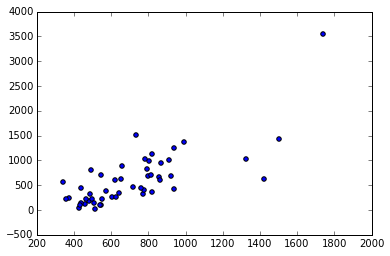

In [9]:
%matplotlib inline
plt.scatter(data.iloc[:,0], data.iloc[:,1])

In [79]:
alphas = np.arange(1,1000000,1000)
ridmod = linear_model.RidgeCV(alphas=alphas, store_cv_values = True)
lasmod = linear_model.LassoCV(alphas=alphas)

In [81]:
#ridmod.fit(data.iloc[:,1:], data.iloc[:,0])
lasmod.fit(data.iloc[:,1:], data.iloc[:,0])

LassoCV(alphas=array([     1,   1001, ..., 998001, 999001]), copy_X=True,
    cv=None, eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
    n_jobs=1, normalize=False, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [77]:
ridmod.coef_

array([ 0.36451587,  0.03368587, -0.00060758,  0.00994624, -0.00697129,
        0.0004656 ])

In [82]:
lasmod.coef_

array([ 0.38447067,  0.        ,  0.        ,  0.        , -0.        ,  0.        ])

In [83]:
lasmod.alpha_

1001

In [88]:
alphas[:10]

array([   1, 1001, 2001, 3001, 4001, 5001, 6001, 7001, 8001, 9001])

<Container object of 20 artists>

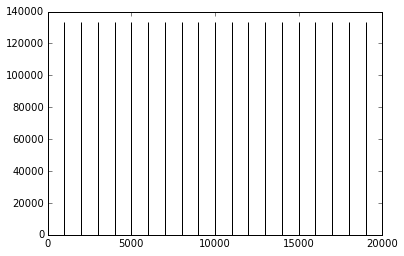

In [89]:
#plt.bar(alphas, np.mean(ridmod.cv_values_, axis=0))
plt.bar(alphas[:20], np.mean(lasmod.mse_path_, axis=1)[:20])


In [91]:
np.mean(lasmod.mse_path_, axis=1)[-20:]

array([ 72980.91708477,  70540.72497008,  68202.39375277,  65965.92343287,
        63831.31401036,  61798.56548524,  59867.67785752,  58038.65112719,
        56311.48529426,  54686.18035873,  53162.73632058,  51741.15317984,
        50421.43093649,  49203.56959053,  48087.56914197,  47073.4295908 ,
        46161.15093703,  45350.73318066,  44642.17632168,  67620.73300395])